In [1]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.status()

  Activating project at `~/Documents/Carnegie-Mellon/Chatterjee Group/Programming/heisenberg-model/Biquadratic.jl/analysis`


Status `~/Documents/Carnegie-Mellon/Chatterjee Group/Programming/heisenberg-model/Biquadratic.jl/analysis/Project.toml`
  [13f3f980] CairoMakie v0.15.3
  [780c37f4] Carlo v0.2.4
  [a93c6f00] DataFrames v1.7.0
  [f67ccb44] HDF5 v0.17.2


In [2]:
using CairoMakie
using Carlo.ResultTools
using DataFrames
using HDF5

In [3]:
# Parse DataFrame from ResultTools into more readily useable form
cleandata(filepath::AbstractString) = select(
    DataFrame(ResultTools.dataframe(filepath)),
    [:J1, :K, :Lx, :Ly, :Mag, :Energy, :Dx0, :Dy0],
)

cleandata (generic function with 1 method)

In [4]:
function generatePlot(data::AbstractDataFrame, x, y; fig=Figure(), fig_pos=(1,1),
                      title, xlabel, ylabel)
    fig[fig_pos...] = Axis(fig; title, xlabel, ylabel)

    vals = getfield.(data[:, y], :val)
    errs = getfield.(data[:, y], :err)
    scatter!(data[:, x], vals)
    errorbars!(data[:, x], vals, errs)

    return fig
end

function generatePlot(data::GroupedDataFrame, x, y; fig=Figure(), fig_pos=(1,1),
                      title, xlabel, ylabel)
    fig = Figure()
    fig[fig_pos...] = Axis(fig; title, xlabel, ylabel)

    for key in keys(data)
        group = data[key]
        vals = getfield.(group[:, y], :val)
        errs = getfield.(group[:, y], :err)
        scatter!(group[:, x], vals, label="$(NamedTuple(key))")
        errorbars!(group[:, x], vals, errs)
    end

    axislegend()

    return fig
end

generatePlot (generic function with 2 methods)

In [5]:
jobname = "j1-sweep"
data = groupby(cleandata("../jobs/" * jobname * ".results.json"), [:K])

Row,J1,K,Lx,Ly,Mag,Energy,Dx0,Dy0
,Float64,Float64,Int64,Int64,Measurem…,Measurem…,Measurem…,Measurem…
1,-2.0,0.2,40,40,0.1276±0.0023,-3.73724±0.00085,0.88545±0.00062,0.90807±0.00072
2,-1.9,0.2,40,40,0.23042±0.00037,-3.57662±0.00062,0.87078±0.00043,0.89757±0.00019
3,-1.8,0.2,40,40,0.1±0.00077,-3.3868±0.001,0.81746±0.0005,0.84426±0.00017
4,-1.7,0.2,40,40,0.1143±0.0019,-3.2245±0.00086,0.78485±0.00041,0.80867±0.00028
5,-1.6,0.2,40,40,0.1043±0.0025,-3.0748±0.00079,0.74163±0.00066,0.76738±0.00055
6,-1.5,0.2,40,40,0.0329±0.00052,-2.9446±0.0012,0.70449±0.00025,0.72215±0.00041
7,-1.4,0.2,40,40,0.02222±0.0008,-2.7921±0.00078,0.64333±0.00053,0.68192±0.00051
8,-1.3,0.2,40,40,0.01999±0.00057,-2.68827±0.00061,0.58686±0.00062,0.63895±0.00074
9,-1.2,0.2,40,40,0.01319±0.00053,-2.56384±0.0004,0.53118±0.0005,0.58365±0.00083


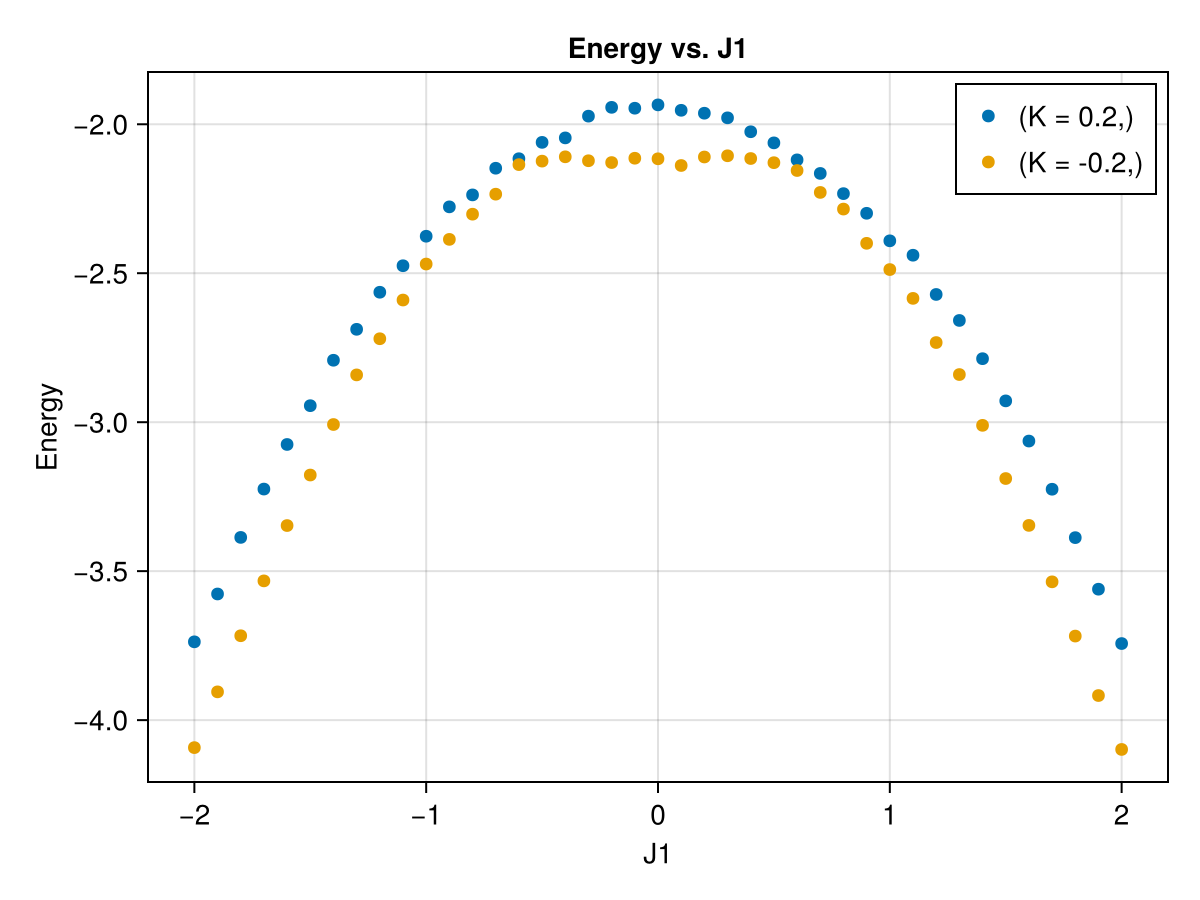

In [6]:
generatePlot(
    data, :J1, :Energy;
    title="Energy vs. J1",
    xlabel="J1",
    ylabel="Energy"
)

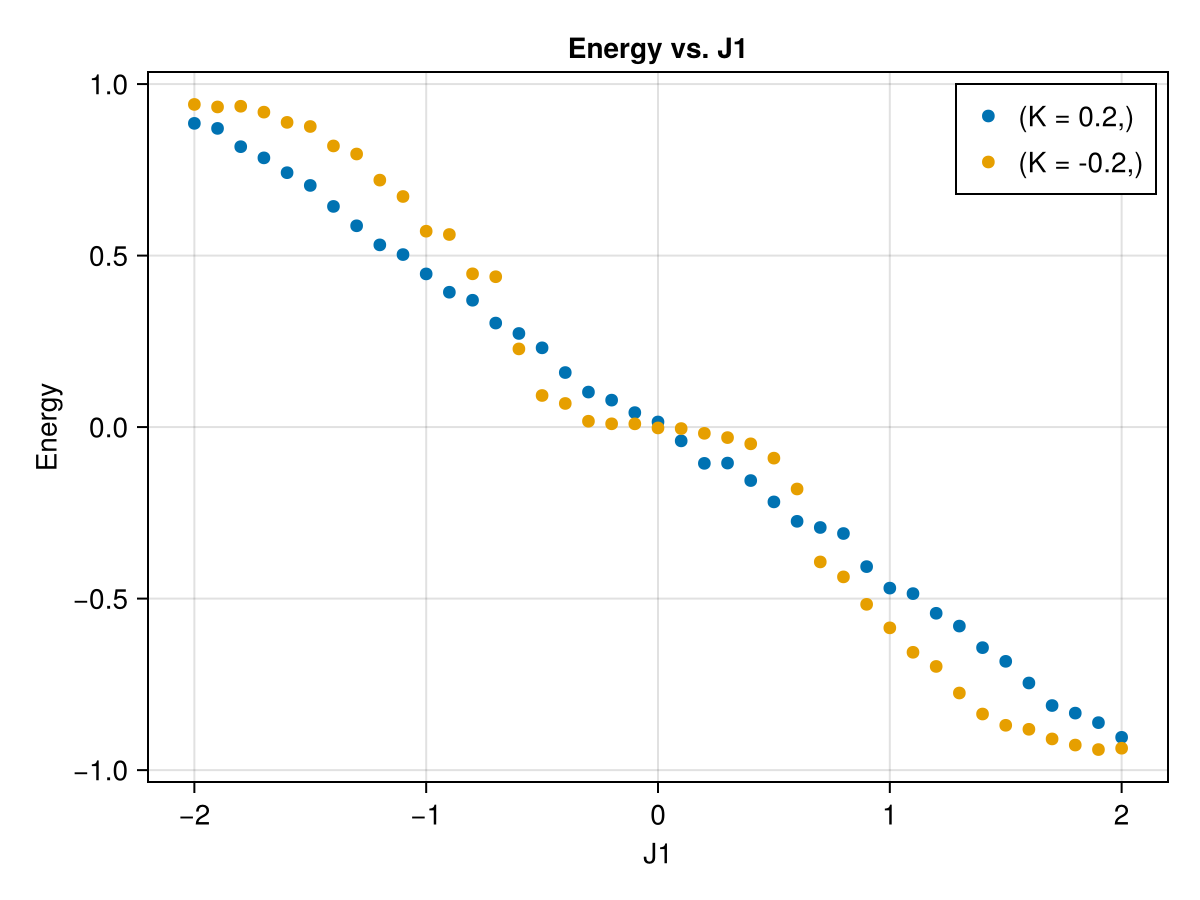

In [7]:
generatePlot(
    data, :J1, :Dx0;
    title="Energy vs. J1",
    xlabel="J1",
    ylabel="Energy"
)

In [8]:
jobname = "j1-fine-sweep"
fine_data = groupby(cleandata("../jobs/" * jobname * ".results.json"), [:K])

Row,J1,K,Lx,Ly,Mag,Energy,Dx0,Dy0
,Float64,Float64,Int64,Int64,Measurem…,Measurem…,Measurem…,Measurem…
1,-1.0,0.2,40,40,0.00842±0.00051,-2.37588±0.00054,0.46278±0.00095,0.50003±0.00071
2,-0.95,0.2,40,40,0.00871±0.00046,-2.34977±0.00079,0.40393±0.00048,0.45938±0.00043
3,-0.9,0.2,40,40,0.01019±0.00068,-2.29571±0.0005,0.40515±0.00021,0.42441±0.00077
4,-0.85,0.2,40,40,0.00802±0.0003,-2.25646±0.00025,0.3644±0.00024,0.41332±0.00037
5,-0.8,0.2,40,40,0.00718±0.00038,-2.23329±0.0004,0.3439±0.00025,0.41199±0.00063
6,-0.75,0.2,40,40,0.00739±0.00071,-2.1817±0.001,0.32756±0.00028,0.35925±0.00041
7,-0.7,0.2,40,40,0.0044±0.00022,-2.15068±0.00058,0.28557±0.00023,0.37021±0.00022
8,-0.65,0.2,40,40,0.0031±0.00023,-2.1339±0.0013,0.30307±0.00015,0.32781±0.00032
9,-0.6,0.2,40,40,0.00453±0.00028,-2.08073±0.00032,0.27603±0.0007,0.2866±0.00023


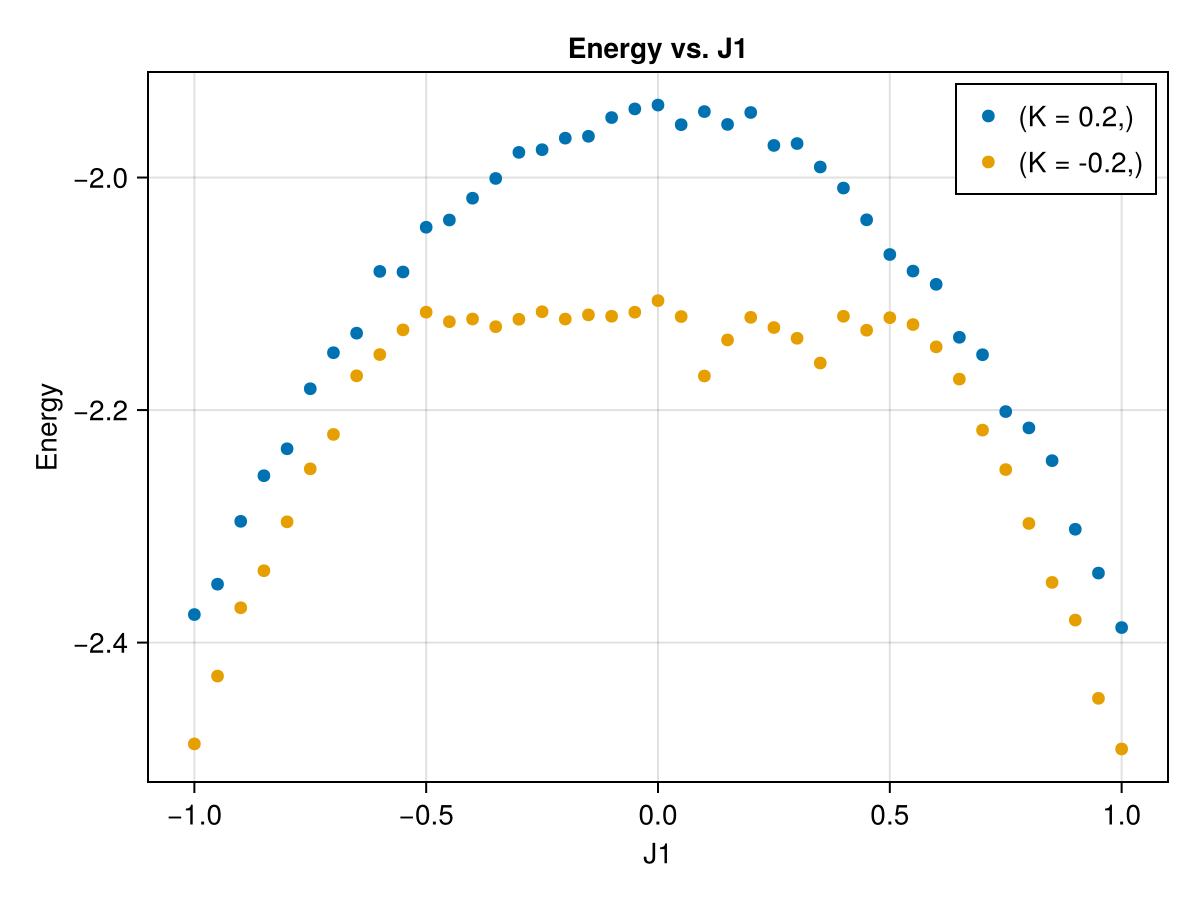

In [9]:
generatePlot(
    fine_data, :J1, :Energy;
    title="Energy vs. J1",
    xlabel="J1",
    ylabel="Energy"
)

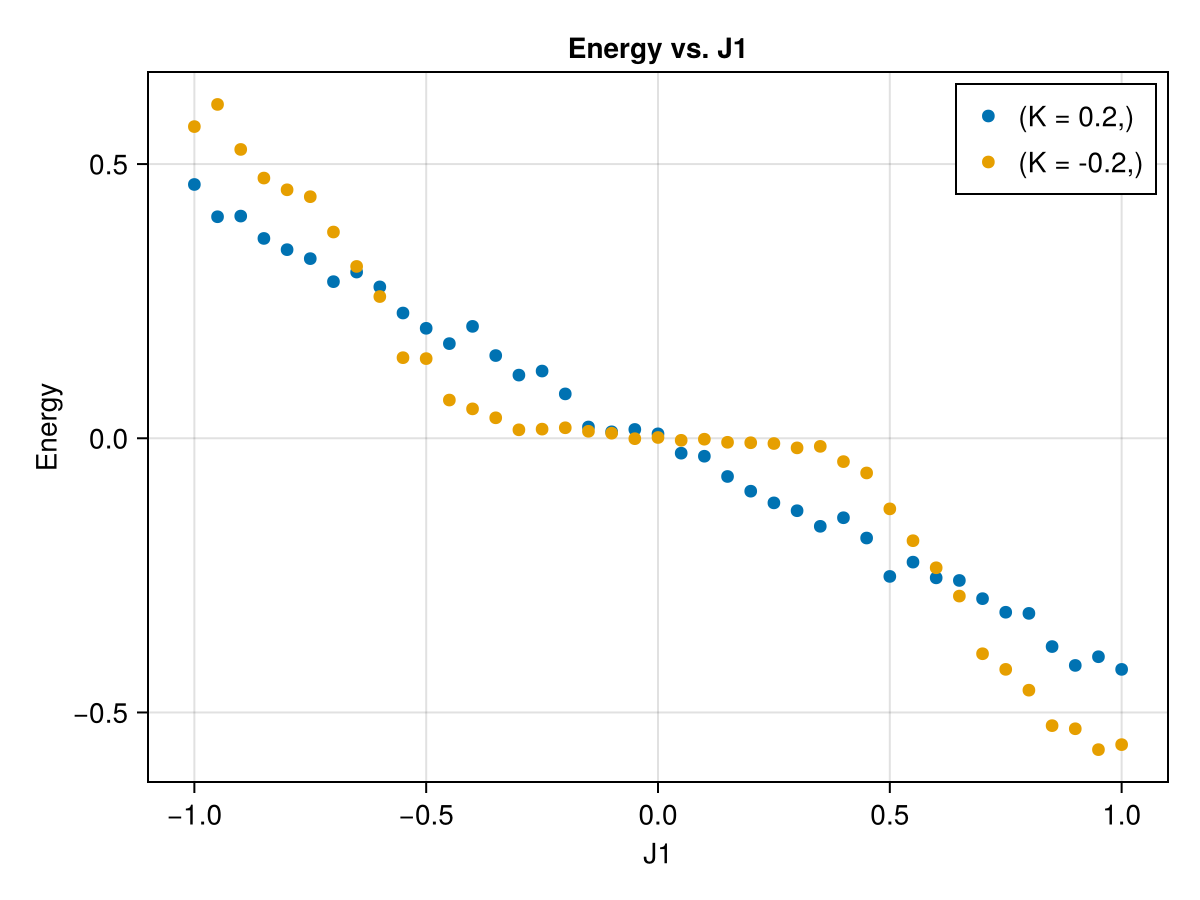

In [10]:
generatePlot(
    fine_data, :J1, :Dx0;
    title="Energy vs. J1",
    xlabel="J1",
    ylabel="Energy"
)

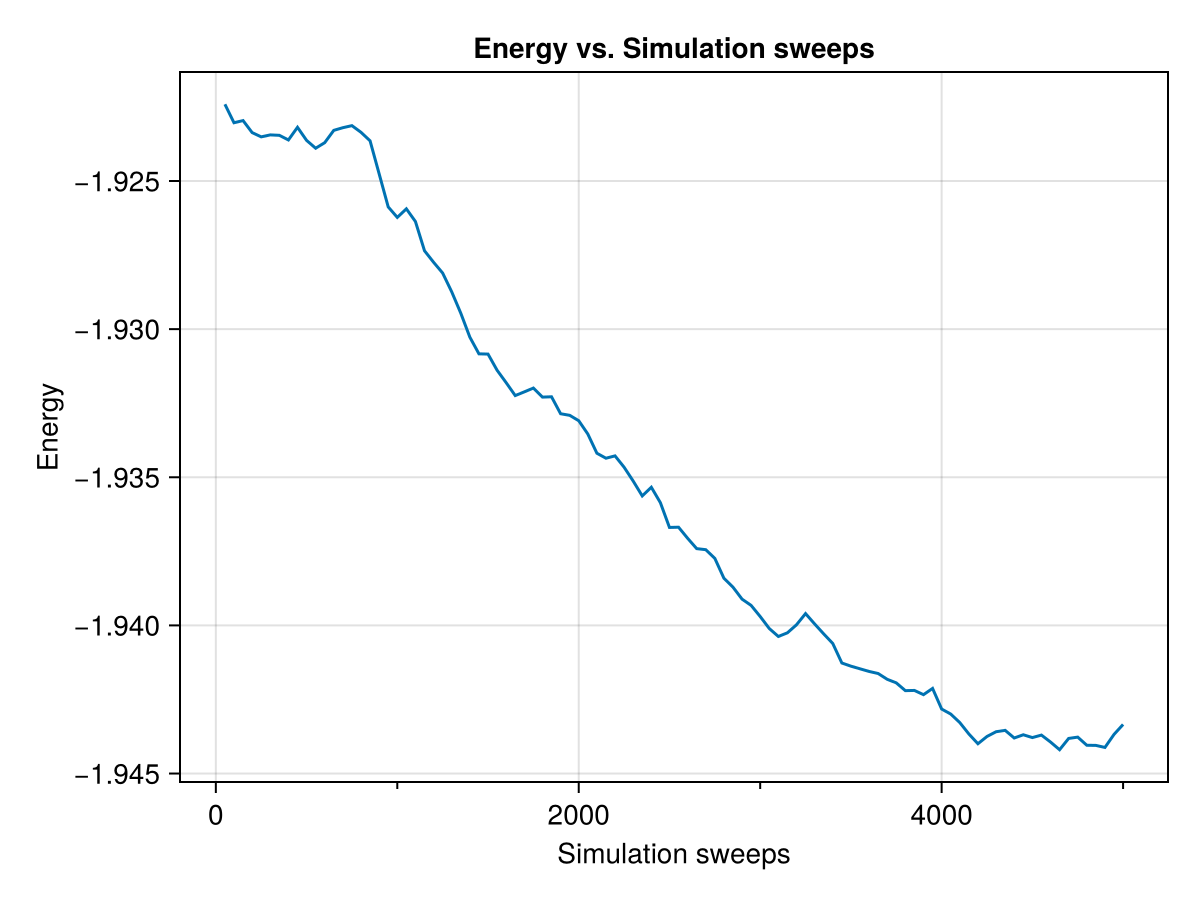

In [14]:
fig = Figure()

ax = fig[1,1] = Axis(
    fig,
    title="Energy vs. Simulation sweeps",
    xlabel="Simulation sweeps",
    ylabel="Energy",
    xminorticksvisible=true
)

task_no = "41"
h5open("../jobs/j1-sweep.data/task00" * task_no * "/run0001.meas.h5") do file
    mag_group = file["observables/Energy"]
    mag_samples = read(mag_group, "samples")
    bin_len = read(mag_group, "bin_length")
    lines!(
        bin_len .* collect(1:length(mag_samples)),
        mag_samples,
        label="T = 2.2435698905536414"
    )
end

fig